<a href="https://colab.research.google.com/github/AnastasiaZAYU/ml-fundamentals-labs/blob/main/02-Unsupervised-and-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виконати наступне:
1. **Зниження розмірності і візуалізація даних.** Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.

2. **Кластерний аналіз.** За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.

3. **Обробка та класифікація текстових даних.** Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image as img
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## 1. Зниження розмірності і візуалізація даних.

### Завантаження та очишення даних

In [2]:
df=pd.read_csv('advertising_ef.csv')
df=df.dropna()

### Вивід назв колонок

In [3]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Clicked on Ad'],
      dtype='object')

### Відокремлення target та стандартизація даних

In [4]:
X = df.drop(['Clicked on Ad'], axis = 1)
y = df['Clicked on Ad']
print(X.shape)

(980, 5)


In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### PCA

In [6]:
pca = PCA()
X_pca = pca.fit_transform(X_std)

### Знаходження часток поясненої дисперсії та їх комулятивної суми

In [7]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
cum_sum_eigenvalues

array([0.40775518, 0.60820965, 0.77357727, 0.90509902, 1.        ])

### Візуалізація часток поясненої дисперсії для головних компонент

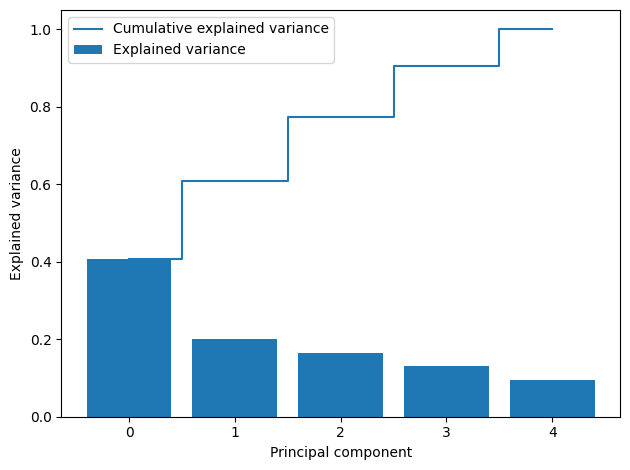

In [8]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Зниження розмірності за допомогою PCA

<Axes: xlabel='pca_1', ylabel='pca_2'>

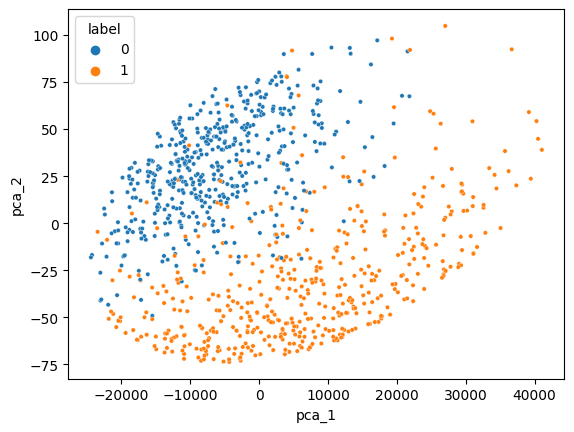

In [9]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax, s=10)

### Візуалізація за допомогою tSNE

<Axes: xlabel='tsne_1', ylabel='tsne_2'>

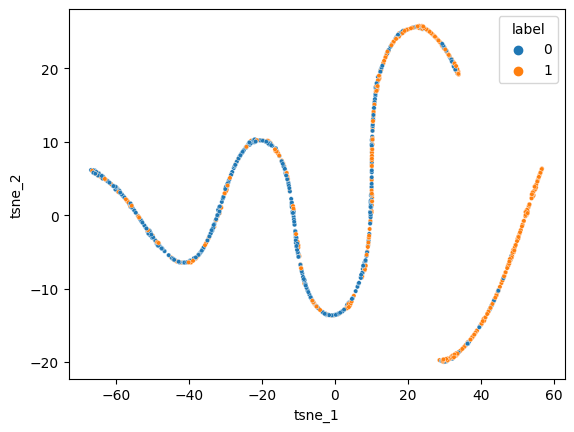

In [10]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)

## 2. Кластерний аналіз.

### Завантаження зображення

In [ ]:
image = img.imread("dog.jpg")

### Перетворення зображення на двовимірний масив numpy

In [ ]:
image = np.array(image, dtype=np.float64) / 255
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

### Квантування зображення за допомогою алгоритму k-means для заданого числа кластерів кольорів

In [ ]:
def KMeans_n(n_colors):
  image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
  kmeans = KMeans(n_clusters=n_colors, n_init="auto", random_state=0).fit(
    image_array_sample
  )
  labels = kmeans.predict(image_array)
  return kmeans, labels

### Функція відтворення зображення

In [ ]:
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)

### Вивід зображень

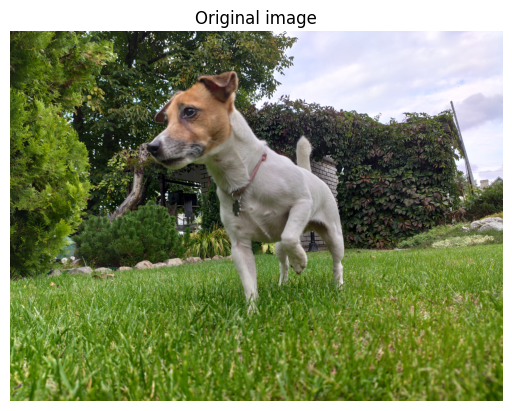

In [ ]:
plt.figure()
plt.axis("off")
plt.title("Original image")
plt.imshow(image)

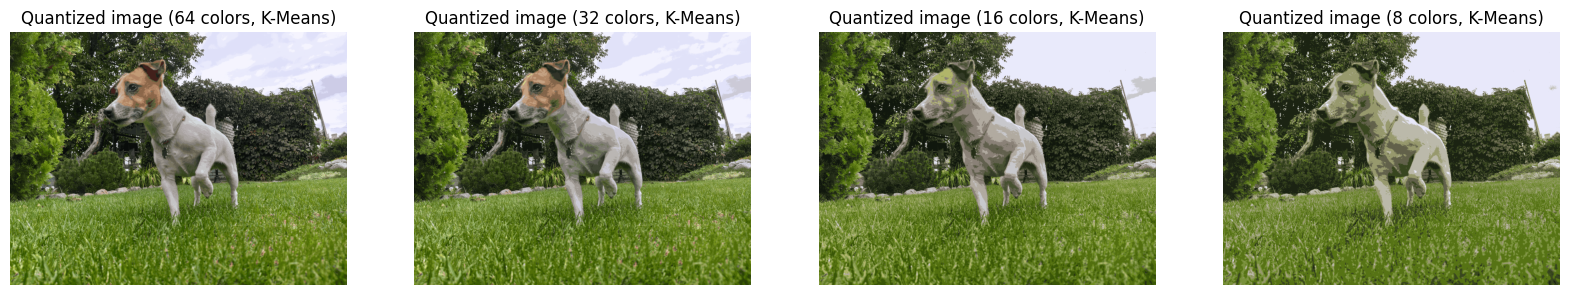

In [ ]:
n_colors=[64, 32, 16, 8]
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i in range(len(n_colors)):
  kmeans,labels=KMeans_n(n_colors[i])
  axs[i].axis("off")
  axs[i].set_title(f"Quantized image ({n_colors[i]} colors, K-Means)")
  axs[i].imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
plt.show()

## 3. Обробка та класифікація текстових даних.

### Завантаження та очищення датасету
https://www.kaggle.com/datasets/joebeachcapital/restaurant-reviews

In [ ]:
df=pd.read_csv('Restaurant_reviews.csv')
df=df.dropna()

### Вивід назв колонок та видалення зайвих

In [ ]:
df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating'], dtype='object')

In [ ]:
df=df.drop(['Restaurant','Reviewer'],axis=1)

### Підрахунок кількості елементів кожного класа

In [ ]:
from collections import Counter
Counter( df['Rating'])

Counter({5: 3826, 4: 2373, 1: 1735, 3: 1192, 2: 684})

### Зменшення кількості класів, шляхом їх об'єднання

In [ ]:
df['Rating'].replace({2: 1, 4: 3},inplace=True)
Counter( df['Rating'])

Counter({5: 3826, 3: 3565, 1: 2419})

### Очищення тексту регулярними виразами

In [ ]:
def clean_text(text):
  stop_words = set(stopwords.words("english"))
  stop_words.update(['restaurant','place','food','taste','service','ordered','order','one','good'])
  text = text.lower()
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub('\n\S+', '', text)
  text = re.sub('\s{2,}', " ", text)
  text = ' '.join([word for word in text.split(' ') if word not in stop_words])
  return text

In [ ]:
df['Review']=df['Review'].apply(clean_text)

In [ ]:
df['Review']

0       ambience quite saturday lunch cost effective s...
1       ambience pleasant evening prompt experience so...
2       must try great great ambience thnx pradeep sub...
3       soumen das arun great guy behavior sincerety c...
4       goodwe kodi drumsticks basket mutton biryani t...
                              ...                        
9805    never fan chinese visited chinese pavilionbanj...
9806    visited friends immediately blown away quality...
9807    im going cut chase excellent must say honey ch...
9808    madhumathi mahajan well start nice courteous s...
9809    personally love prefer chinese couple times hu...
Name: Review, Length: 9810, dtype: object

### Візуалізація WordCloud для кожного класу

In [ ]:
def visualize(label):
    text = ''
    for msg in df[df['Rating'] == label]['Review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

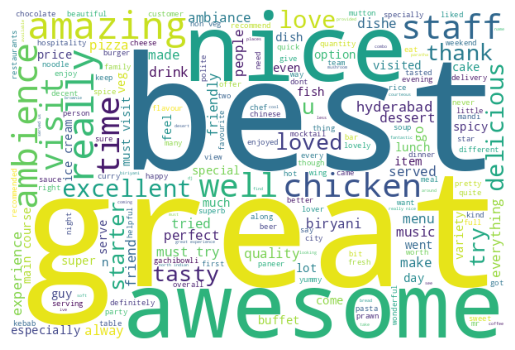

In [ ]:
visualize(5)

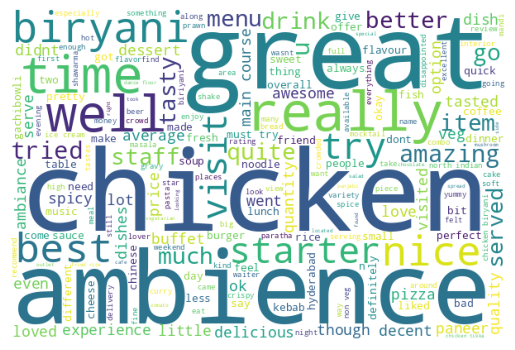

In [ ]:
visualize(3)

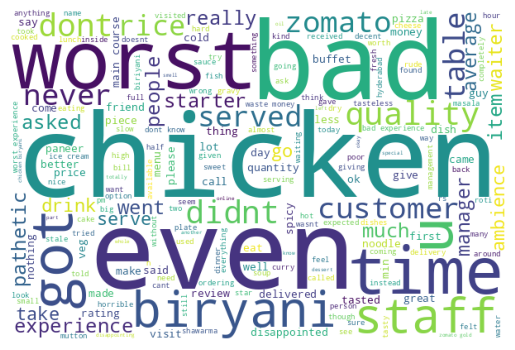

In [ ]:
visualize(1)

### Розбиття датасету на тренувальні і тестові дані

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Rating'], test_size=0.30, random_state=23)

### Векторизація текстів за допомогою TFIDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=700, min_df=15)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

### Класифікацію текстових даних за допомогою SVC

In [ ]:
svc = SVC(C=1, gamma = 1, kernel = 'rbf').fit(tfidf_train,y_train)
svc_pred = svc.predict(tfidf_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           1       0.82      0.74      0.77       717
           3       0.62      0.69      0.66      1054
           5       0.77      0.74      0.76      1172

    accuracy                           0.72      2943
   macro avg       0.74      0.72      0.73      2943
weighted avg       0.73      0.72      0.73      2943



### Класифікацію текстових даних за допомогою MultinomialNB

In [ ]:
NB = MultinomialNB(alpha=0.1).fit(tfidf_train, y_train)
nb_pred = NB.predict(tfidf_test)
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           1       0.82      0.74      0.78       717
           3       0.64      0.70      0.67      1054
           5       0.78      0.76      0.77      1172

    accuracy                           0.73      2943
   macro avg       0.75      0.73      0.74      2943
weighted avg       0.74      0.73      0.74      2943

